In [2]:
import numpy as np
import nibabel as nib
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric
import os.path
from dipy.viz import regtools

In [3]:
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
fetch_stanford_hardi()
nib_stanford, gtab_stanford = read_stanford_hardi()
stanford_b0 = np.squeeze(nib_stanford.get_data())[...,0]

Creating new folder /Users/jdrussell3/.dipy/stanford_hardi
Download Progress: [########################################] 100.00%  of 87.15 MBDownloading "HARDI150.bval" to /Users/jdrussell3/.dipy/stanford_hardi
Download Progress: [########################################] 100.00%  of 0.00 MBDownloading "HARDI150.bvec" to /Users/jdrussell3/.dipy/stanford_hardi
Download Progress: [########################################] 100.00%  of 0.00 MBFiles successfully downloaded to /Users/jdrussell3/.dipy/stanford_hardi
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/jdrussell3/.dipy/stanford_hardi 


In [4]:
from dipy.data.fetcher import fetch_syn_data, read_syn_data
fetch_syn_data()
nib_syn_t1, nib_syn_b0 = read_syn_data()
syn_b0 = np.array(nib_syn_b0.get_data())

Creating new folder /Users/jdrussell3/.dipy/syn_test
Data size is approximately 12MB
Download Progress: [########################################] 100.00%  of 10.25 MBDownloading "b0.nii.gz" to /Users/jdrussell3/.dipy/syn_test
Download Progress: [########################################] 100.00%  of 1.34 MBFiles successfully downloaded to /Users/jdrussell3/.dipy/syn_test
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/jdrussell3/.dipy/syn_test 


In [5]:
from dipy.segment.mask import median_otsu
stanford_b0_masked, stanford_b0_mask = median_otsu(stanford_b0, median_radius=4, numpass=4)
syn_b0_masked, syn_b0_mask = median_otsu(syn_b0, median_radius=4, numpass=4)
static = stanford_b0_masked
static_affine = nib_stanford.affine
moving = syn_b0_masked
moving_affine = nib_syn_b0.affine

In [6]:
pre_align = np.array([[1.02783543e+00, -4.83019053e-02, -6.07735639e-02, -2.57654118e+00],
                      [4.34051706e-03, 9.41918267e-01, -2.66525861e-01, 3.23579799e+01],
                      [5.34288908e-02, 2.90262026e-01, 9.80820307e-01, -1.46216651e+01],
                      [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [7]:
from dipy.align.imaffine import AffineMap
affine_map = AffineMap(pre_align,
                       static.shape, static_affine,
                       moving.shape, moving_affine)

resampled = affine_map.transform(moving)

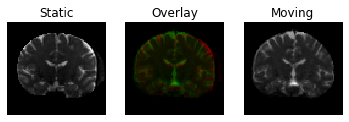

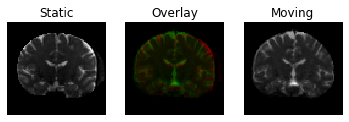

In [8]:
regtools.overlay_slices(static, resampled, None, 1, 'Static', 'Moving', 'input_3d.png')

In [9]:
metric = CCMetric(3)

In [10]:
level_iters = [10, 10, 5]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)

In [11]:
mapping = sdr.optimize(static, moving, static_affine, moving_affine, pre_align)

Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0


In [12]:
warped_moving = mapping.transform(moving)

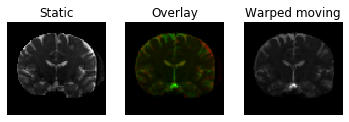

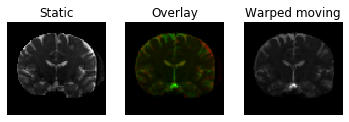

In [13]:
regtools.overlay_slices(static, warped_moving, None, 1, 'Static', 'Warped moving', 'warped_moving.png')